In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
serialNo = df["Serial No."].values

df.drop(["Serial No."],axis=1,inplace = True)

df=df.rename(columns = {'Chance of Admit ':'Chance of Admit'})

In [4]:
X=df.drop('Chance of Admit',axis=1)
y=df['Chance of Admit']

In [5]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#Normalisation works slightly better for Regression.
X_norm=preprocessing.normalize(X)
X_train,X_test,y_train,y_test=train_test_split(X_norm,y,test_size=0.20,random_state=101)

In [7]:
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier

In [8]:
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.metrics import accuracy_score,mean_squared_error

In [9]:
model=DecisionTreeRegressor()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [10]:
rms=np.sqrt(mean_squared_error(y_test, predictions))
print(f"Decision Tree Model RMS: {rms}")

Decision Tree Model RMS: 0.10555567251455508


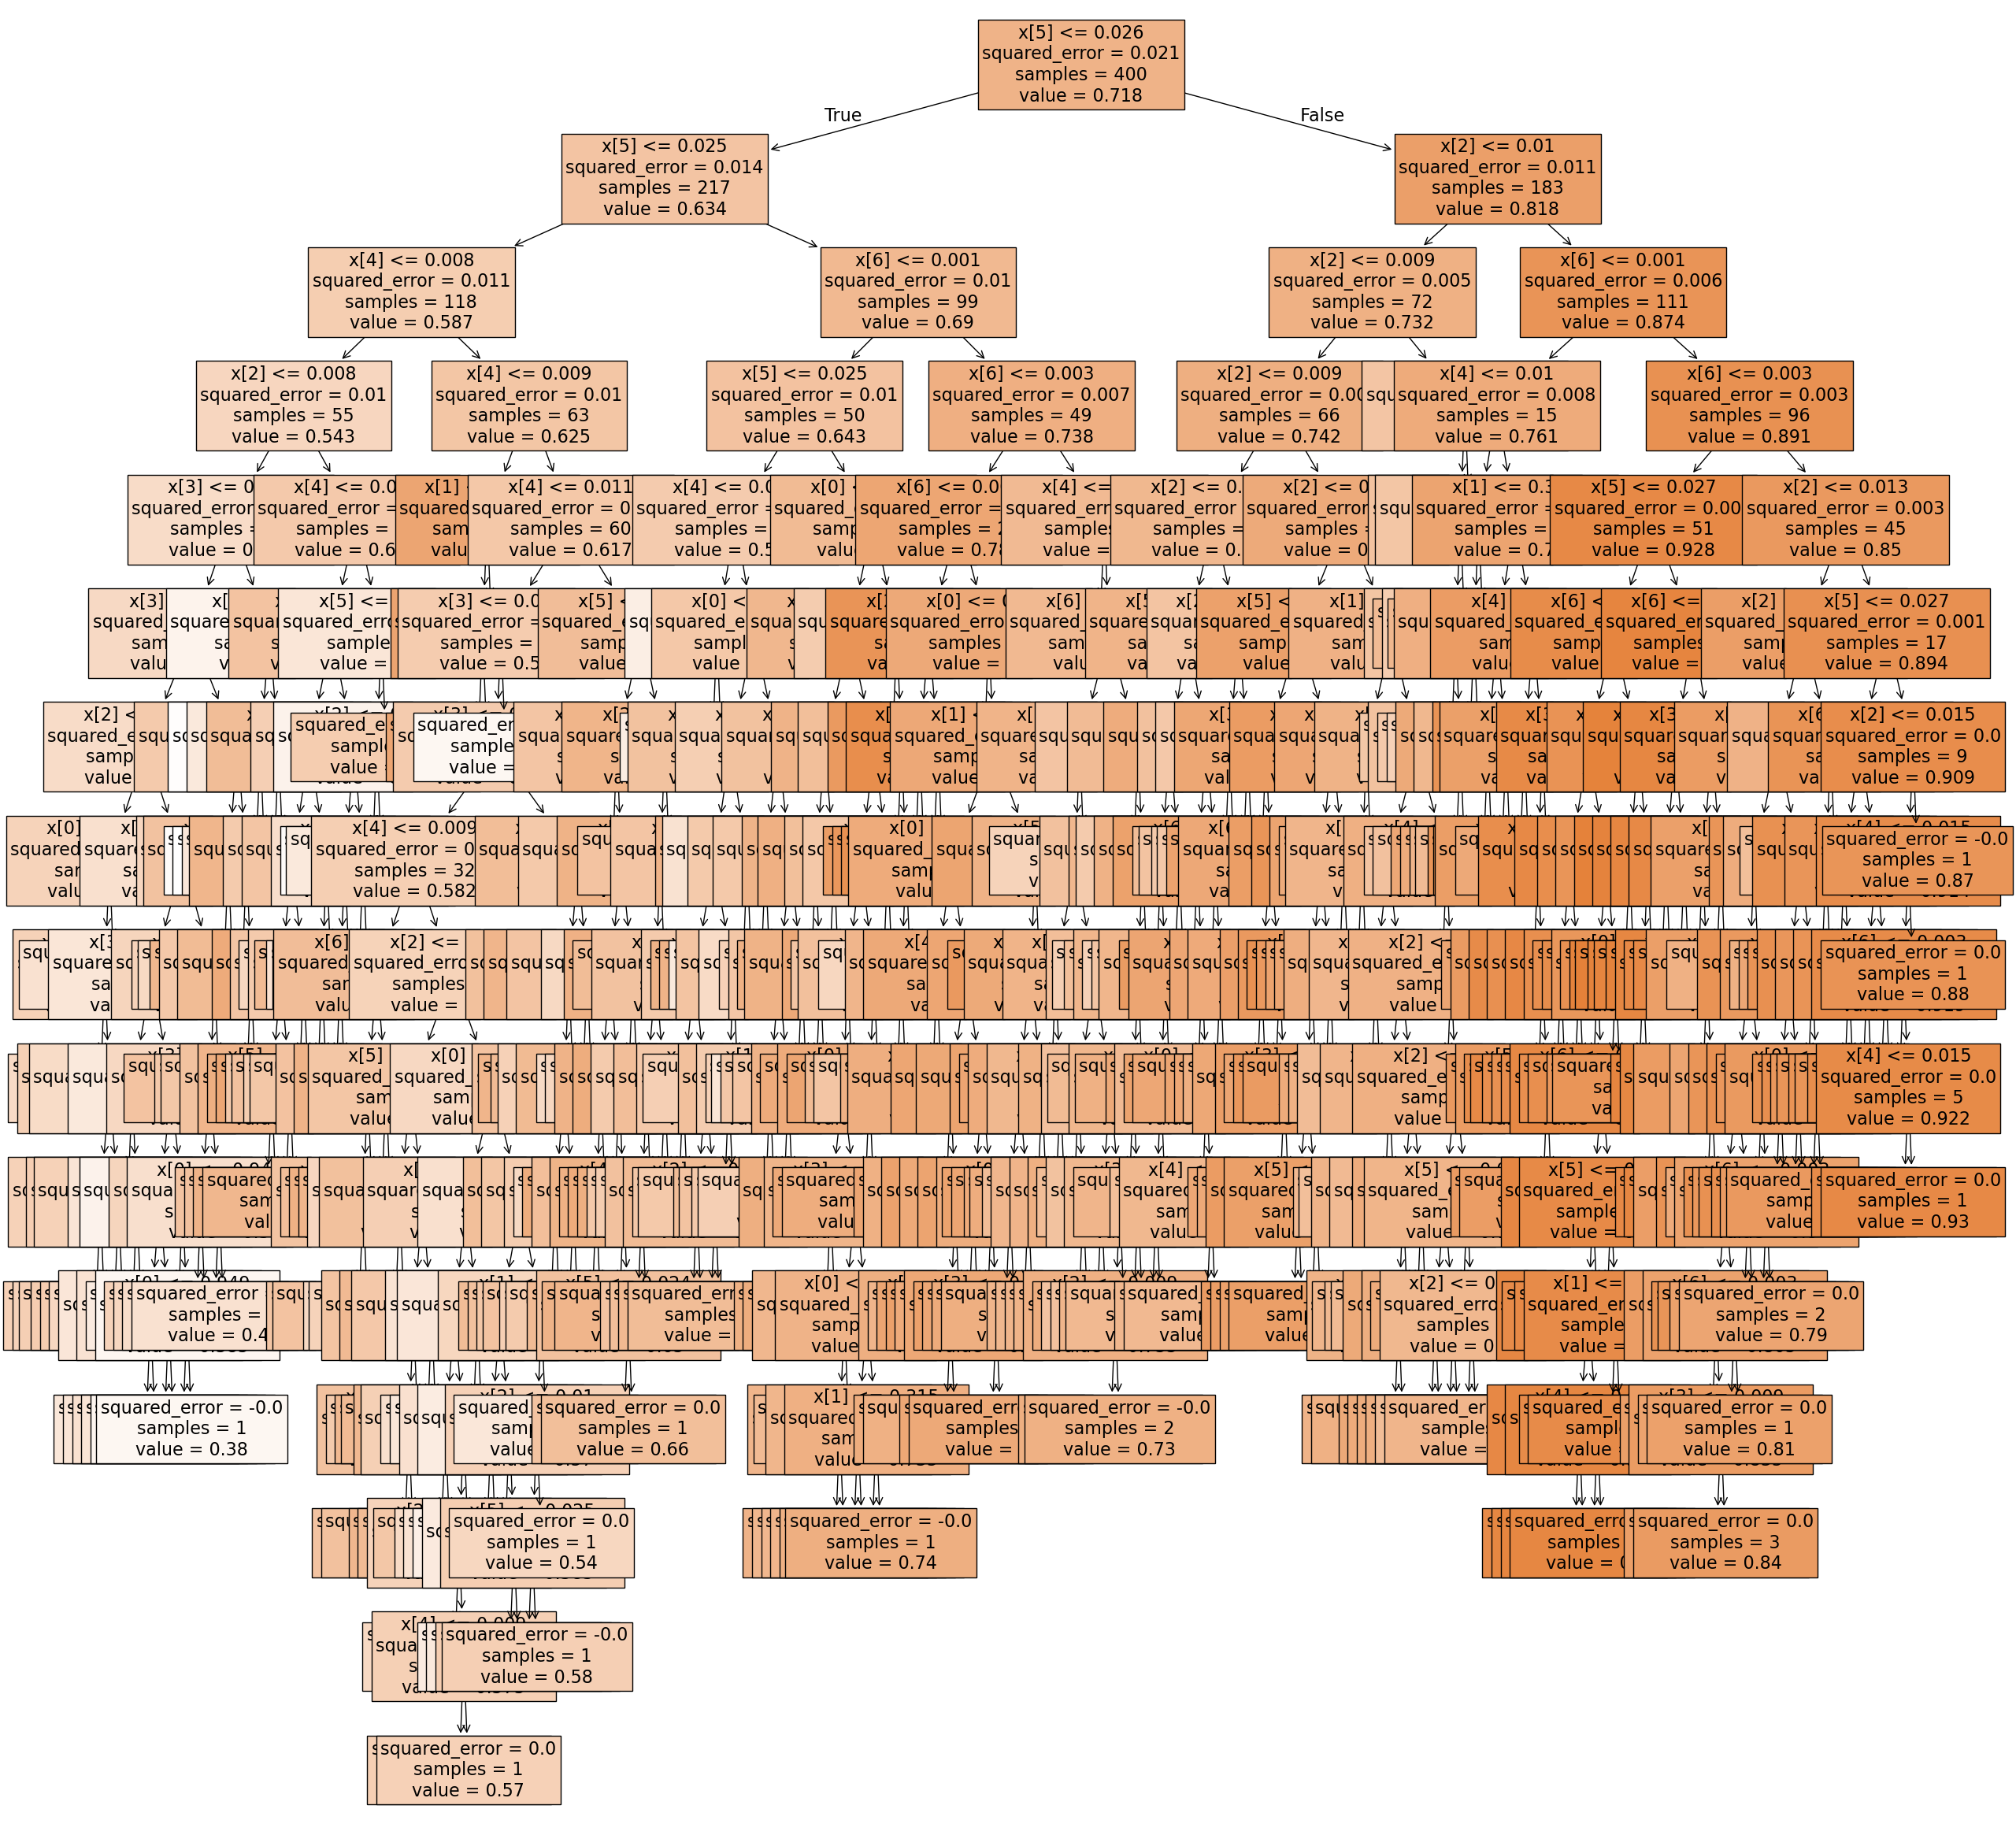

In [11]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
tree.plot_tree(model, filled=True, fontsize=16)
plt.show()

#Classification

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,mean_squared_error

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=101)

In [13]:
#If Chance of Admit greater than 80% we classify it as 1
y_train_c = [1 if each > 0.8 else 0 for each in y_train]
y_test_c  = [1 if each > 0.8 else 0 for each in y_test]

In [14]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train_c)
predictions = model.predict(X_test)

In [15]:
predictions = model.predict(X_test)
print(accuracy_score(y_test_c,predictions))

0.92


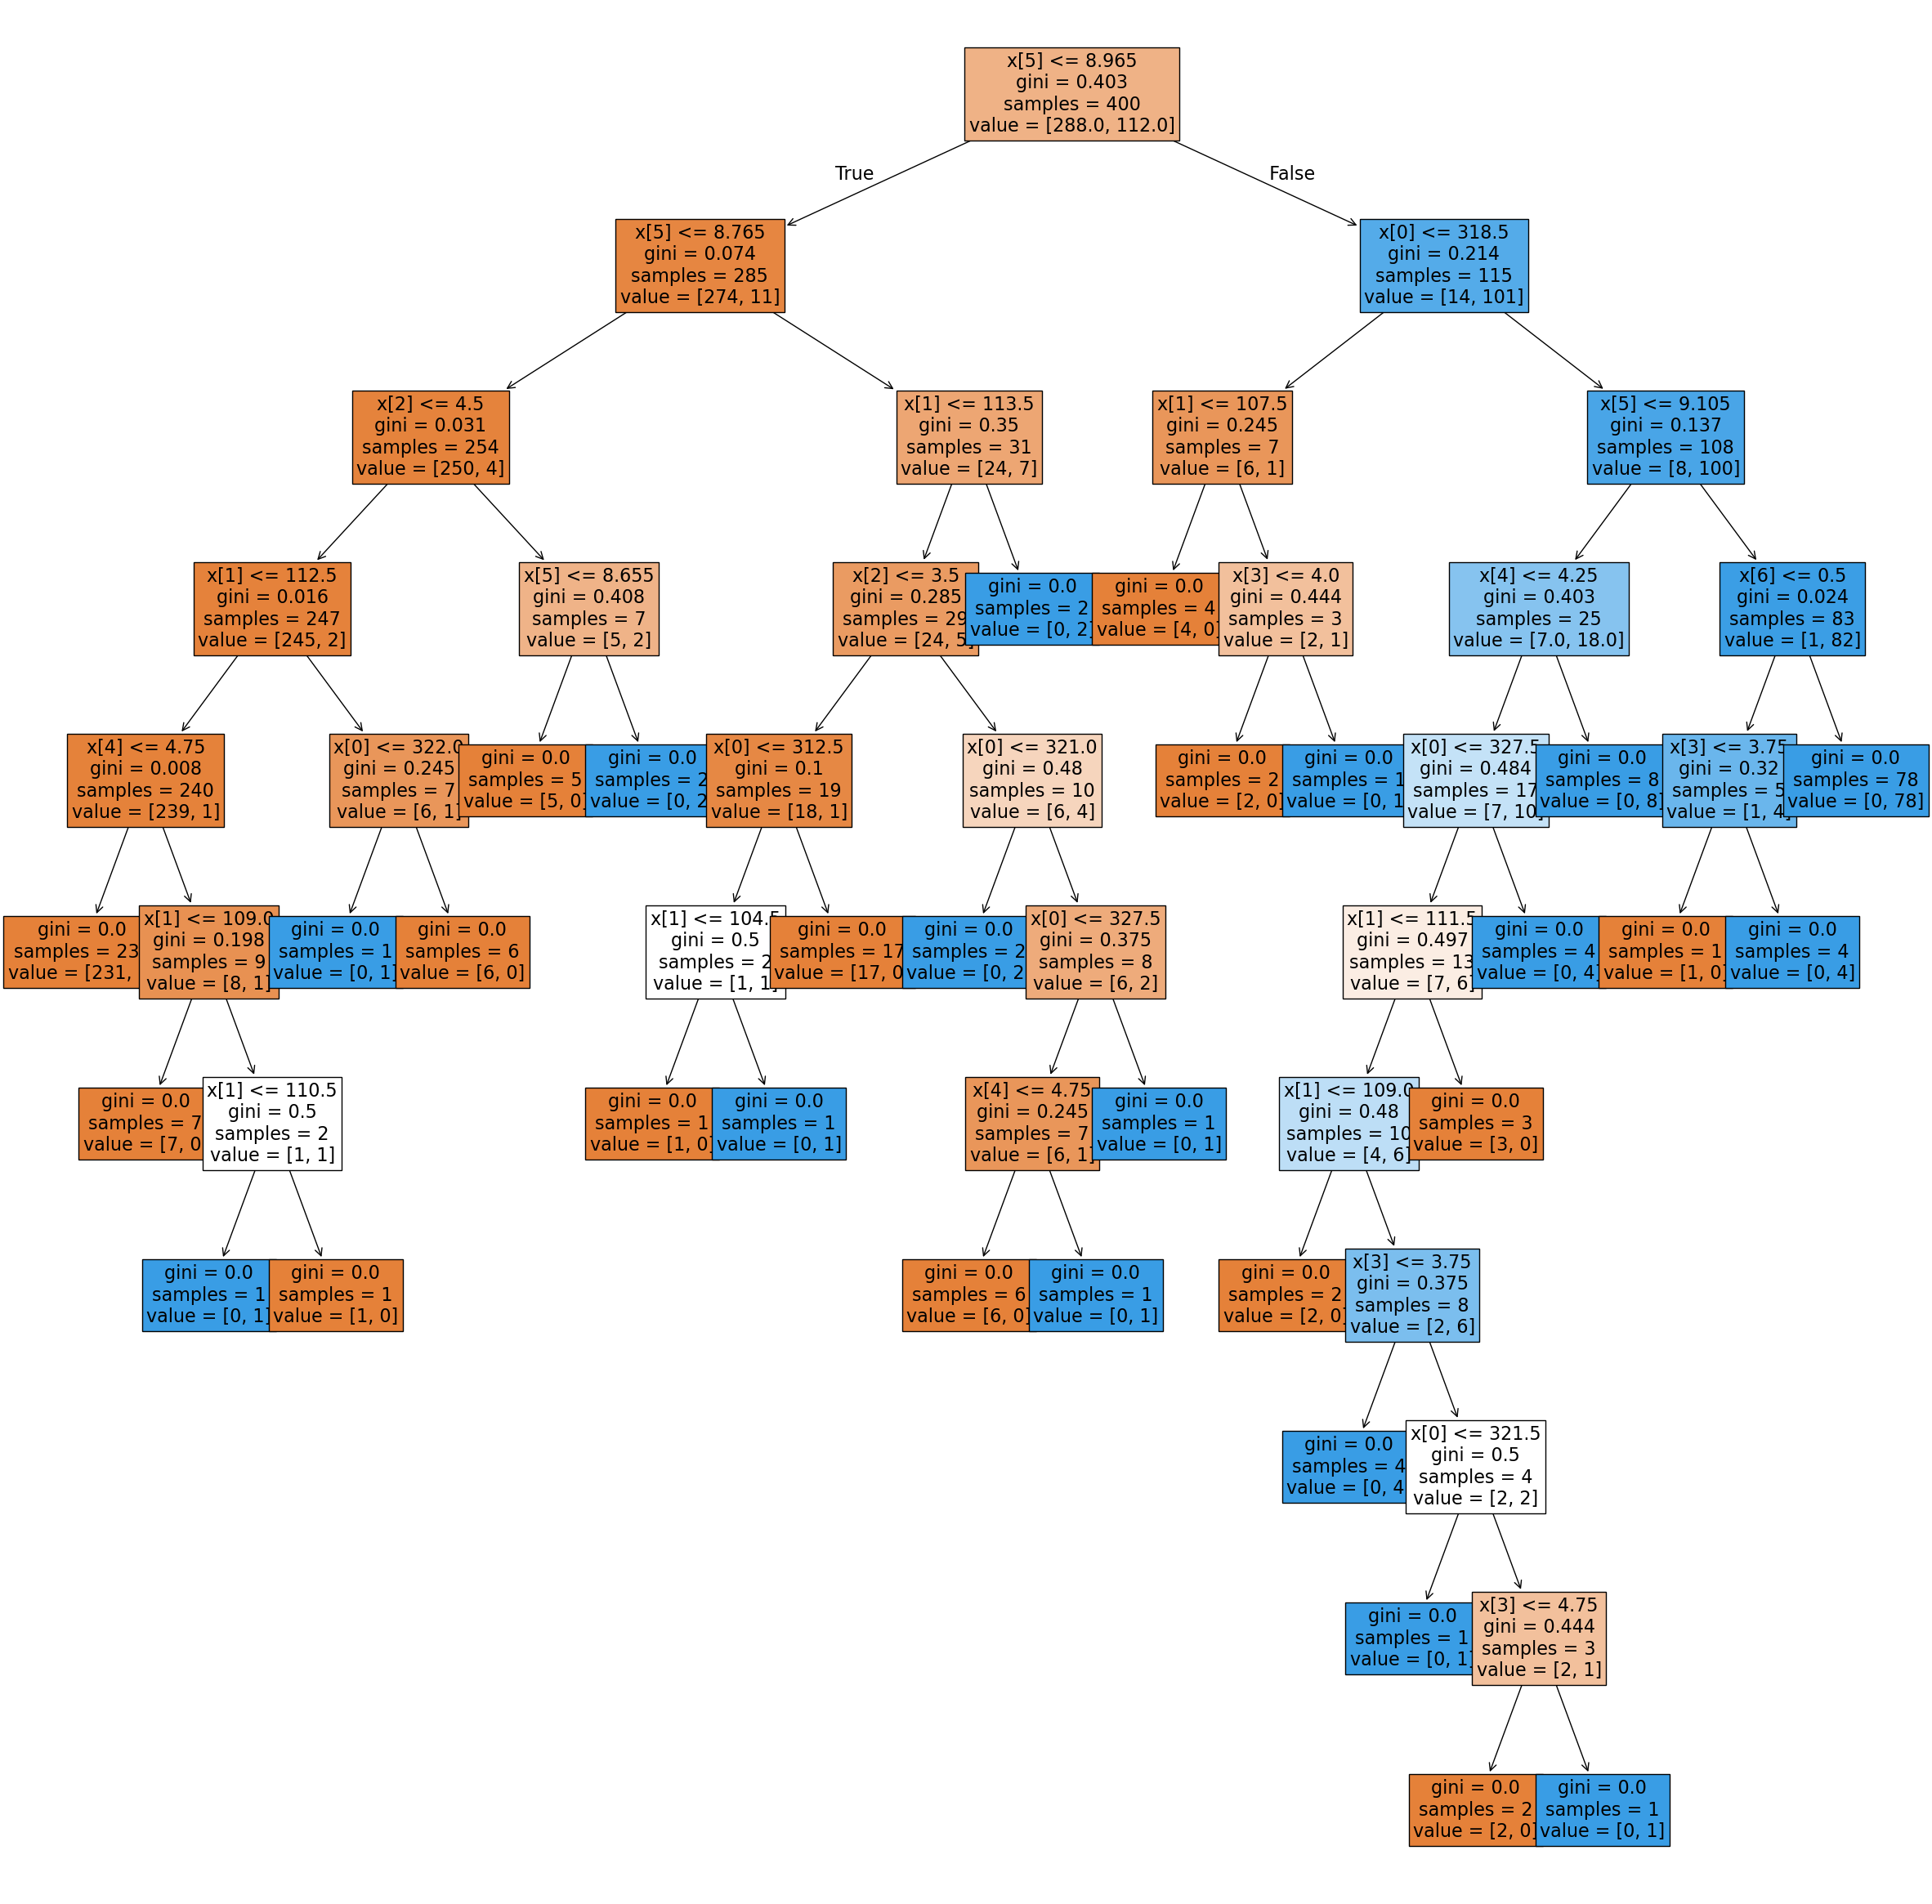

In [16]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
tree.plot_tree(model, filled=True, fontsize=16)
plt.show()